In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data
df = pd.read_csv('Data_drop_year.csv')

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [4]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")

Number of rows in data = 87646
Number of columns in data = 16


**Sample data:**


In [5]:
categories = list(df.columns.values)
categories = categories[6:]

# Test ROC

In [12]:
# create train and test data
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df.drop(['Name','Time','Store','Comment','Aspect','polarity'],axis=1), test_size=0.2, random_state=42)

In [13]:
y_train.head()

,'data integration','marketing and communication','technology','payment and checkout','shopping experience','unemployment','product available and store design','price and value','general','privacy and security'
1647,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52561,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# create a pipeline for logistic regression with onevsrest classifier and tfidf vectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# import roc_auc_score
from sklearn.metrics import roc_auc_score

# create a pipeline
logPipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.8, max_features=5000)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
])

In [15]:
# fit the training dataset on the pipeline
logPipeline.fit(X_train, y_train)

# make predictions and get the accuracy
predictions = logPipeline.predict(X_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

# roc_auc_score
print("roc_auc_score = ",roc_auc_score(y_test,predictions))

Accuracy =  0.7066172276098117
roc_auc_score =  0.8506137895334195


In [16]:
y_train_pred_proba = logPipeline.predict_proba(X_train)
y_valid_pred_proba = logPipeline.predict_proba(X_test)

In [17]:
roc_auc_score_train = roc_auc_score(y_train, y_train_pred_proba,average='weighted')
roc_auc_score_test = roc_auc_score(y_test, y_valid_pred_proba,average='weighted')

print("ROC AUC Score Train:", roc_auc_score_train)
print("ROC AUC Score Test:", roc_auc_score_test)

ROC AUC Score Train: 0.9867161320740917
ROC AUC Score Test: 0.9823538048117171


# Aspect classification

In [6]:
# Train and test data for aspects classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df.drop(['Name','Time','Store','Comment','Aspect','polarity'],axis=1), test_size=0.2, random_state=42)

In [7]:
y_train.head()

,'data integration','marketing and communication','technology','payment and checkout','shopping experience','unemployment','product available and store design','price and value','general','privacy and security'
1647,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52561,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# vectorize the text 
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(max_df=0.8, max_features=5000, ngram_range=(1,2))

# fit and transform train and test features
X_train_tfidf = TfidfVectorizer.fit_transform(X_train)
X_test_tfidf = TfidfVectorizer.transform(X_test)

### Logistic regression

In [9]:
# cross validation for logistic regression with onevsrest classifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# onerest classifier with kfold cv
clf_log = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=100,penalty='l1',C=10), n_jobs=1)

In [ ]:
# cross validate
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr_weighted']
scores = cross_validate(clf_log, X_train_tfidf, y_train, cv=5, scoring=scoring, return_train_score=True)

In [ ]:
# print scores
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print ("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print ("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
print ("F1: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
print ("ROC AUC: %0.2f (+/- %0.2f)" % (scores['test_roc_auc_ovr_weighted'].mean(), scores['test_roc_auc_ovr_weighted'].std() * 2))

### Decision tree

In [10]:
#build decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [11]:
# onevsrestclassifier with decision tree
clf_dec = OneVsRestClassifier(DecisionTreeClassifier(random_state=0), n_jobs=1)

In [ ]:
#cross_validate
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro', 'roc_auc_ovr_weighted']
scores=cross_validate(clf_dec, X_train_tfidf, y_train, cv=10, scoring=scoring, return_train_score=True)

In [ ]:
# print scores
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print ("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print ("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
print ("F1: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
print ("ROC AUC: %0.2f (+/- %0.2f)" % (scores['test_roc_auc_ovr_weighted'].mean(), scores['test_roc_auc_ovr_weighted'].std() * 2))

### ROC curves

In [12]:
# roc curve from logistics regression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.tree import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# onerest classifier with kfold cv
clf_log = OneVsRestClassifier(LogisticRegression(solver='saga',max_iter=100,penalty='l1',C=10), n_jobs=1)

# onevsrestclassifier with decision tree
clf_dec = OneVsRestClassifier(DecisionTreeClassifier(random_state=0), n_jobs=1)

# one rest classifier with random forest
clf_random = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=910,random_state=0), n_jobs=1)

# one rest classifier with KNN
clf_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=8), n_jobs=1)

# Ensemble learning with 4 models
from sklearn.ensemble import VotingClassifier
# create a pipeline for ensemble model
ensemble = Pipeline([
        
    ('clf', OneVsRestClassifier(VotingClassifier(estimators=[
        ('lr', clf_log),
        ('knn', clf_knn),
        ('dt', clf_dec),
        ('rf', clf_random)
    ], voting='soft')))
])



# binarize the output of the classifier
y = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test_bi = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

# fit the classifier
clf_log.fit(X_train_tfidf, y)
clf_dec.fit(X_train_tfidf, y)
clf_knn.fit(X_train_tfidf, y)
clf_random.fit(X_train_tfidf, y)
ensemble.fit(X_train_tfidf, y)

# predict the probabilities
y_score_log = clf_log.predict_proba(X_test_tfidf)
y_score_dec = clf_dec.predict_proba(X_test_tfidf)
y_score_knn = clf_knn.predict_proba(X_test_tfidf)
y_score_random = clf_random.predict_proba(X_test_tfidf)
y_score_ensemble = ensemble.predict_proba(X_test_tfidf)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [13]:
# Compute ROC curve and ROC area for each class
fpr_log = dict()
tpr_log = dict()
roc_auc_log = dict()
fpr_dec = dict()
tpr_dec = dict()
roc_auc_dec = dict()
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
fpr_random = dict()
tpr_random = dict()
roc_auc_random = dict()
fpr_ensemble = dict()
tpr_ensemble = dict()
roc_auc_ensemble = dict()
for i in range(n_classes):
    fpr_log[i], tpr_log[i], _ = roc_curve(y_test_bi[:, i], y_score_log[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])
    fpr_dec[i], tpr_dec[i], _ = roc_curve(y_test_bi[:, i], y_score_dec[:, i])
    roc_auc_dec[i] = auc(fpr_dec[i], tpr_dec[i])
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bi[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    fpr_random[i], tpr_random[i], _ = roc_curve(y_test_bi[:, i], y_score_random[:, i])
    roc_auc_random[i] = auc(fpr_random[i], tpr_random[i])
    fpr_ensemble[i], tpr_ensemble[i], _ = roc_curve(y_test_bi[:, i], y_score_ensemble[:, i])
    roc_auc_ensemble[i] = auc(fpr_ensemble[i], tpr_ensemble[i])

# Compute micro-average ROC curve and ROC area
fpr_log["micro"], tpr_log["micro"], _ = roc_curve(y_test_bi.ravel(), y_score_log.ravel())
roc_auc_log["micro"] = auc(fpr_log["micro"], tpr_log["micro"])
fpr_dec["micro"], tpr_dec["micro"], _ = roc_curve(y_test_bi.ravel(), y_score_dec.ravel())
roc_auc_dec["micro"] = auc(fpr_dec["micro"], tpr_dec["micro"])
fpr_knn["micro"], tpr_knn["micro"], _ = roc_curve(y_test_bi.ravel(), y_score_knn.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])
fpr_random["micro"], tpr_random["micro"], _ = roc_curve(y_test_bi.ravel(), y_score_random.ravel())
roc_auc_random["micro"] = auc(fpr_random["micro"], tpr_random["micro"])
fpr_ensemble["micro"], tpr_ensemble["micro"], _ = roc_curve(y_test_bi.ravel(), y_score_ensemble.ravel())
roc_auc_ensemble["micro"] = auc(fpr_ensemble["micro"], tpr_ensemble["micro"])

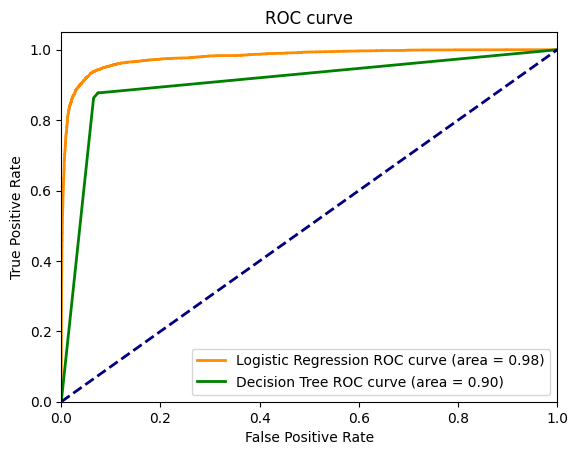

In [14]:
# plot the roc curve
plt.figure()
lw = 1
plt.plot(fpr_log[2], tpr_log[2], color='darkorange',
            lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc_log[2])
plt.plot(fpr_dec[2], tpr_dec[2], color='green',
            lw=lw, label='Decision Tree (area = %0.2f)' % roc_auc_dec[2])
plt.plot(fpr_knn[2], tpr_knn[2], color='blue',
            lw=lw, label='KNN (area = %0.2f)' % roc_auc_knn[2])
plt.plot(fpr_random[2], tpr_random[2], color='red',
            lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_random[2])
plt.plot(fpr_ensemble[2], tpr_ensemble[2], color='purple',
            lw=lw, label='Ensemble (area = %0.2f)' % roc_auc_ensemble[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# calculate the auc
auc_log = roc_auc_score(y_test_bi, y_score_log, average='macro', multi_class='ovr')
print('Logistic Regression: ROC AUC=%.3f' % (auc_log))

Logistic Regression: ROC AUC=0.979


# Polarity classifier

In [6]:
# new train test list for predicting polarity
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['polarity'], test_size=0.2, random_state=42)

In [7]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [9]:
# encode y_train and y_test
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_code = label_encoder.fit_transform(y_train)
y_test_code = label_encoder.transform(y_test)

### Logistic regression

In [11]:
# build a pipeline for logistic regression with onevsrest classifier and tfidf vectorizer with cross validation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logPol = LogisticRegression()
logPolOvr = OneVsRestClassifier(logPol,n_jobs=-1)

In [12]:
# gridsearch cv for logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {'estimator__C': [0.1, 1, 10, 100, 1000],
              'estimator__penalty': ['l1', 'l2'],
              'estimator__solver': ['liblinear', 'saga'],
              'estimator__max_iter': [100, 1000, 2500, 5000]}
clf_logPol = GridSearchCV(logPolOvr, parameters, cv=2, scoring='accuracy', n_jobs=-1)

# find the best parameters
clf_logPol.fit(X_train_tfidf, y_train_code)
print(clf_logPol.best_params_)

{'estimator__C': 10, 'estimator__max_iter': 100, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}


In [14]:
logPolOvr = OneVsRestClassifier(LogisticRegression(C=10, max_iter = 100, penalty = 'l1', solver = 'saga'),n_jobs=-1)

logPolOvr.fit(X_train_tfidf, y_train_code)

# predict on test data
y_pred_logPol = logPolOvr.predict(X_test_tfidf)

# print the report
from sklearn.metrics import classification_report
print(classification_report(y_test_code, y_pred_logPol))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5184
           1       0.93      0.95      0.94      6257
           2       0.85      0.86      0.85      6089

    accuracy                           0.87     17530
   macro avg       0.87      0.87      0.87     17530
weighted avg       0.87      0.87      0.87     17530



In [15]:
# cross validation
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro', 'roc_auc_ovr_weighted']
scores=cross_validate(logPolOvr, X_train_tfidf, y_train_code, cv=10, scoring=scoring, return_train_score=True)

# print scores
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print ("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print ("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
print ("F1: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
print ("ROC AUC: %0.2f (+/- %0.2f)" % (scores['test_roc_auc_ovr_weighted'].mean(), scores['test_roc_auc_ovr_weighted'].std() * 2))

Accuracy: 0.88 (+/- 0.01)
Precision: 0.87 (+/- 0.01)
Recall: 0.87 (+/- 0.01)
F1: 0.87 (+/- 0.01)
ROC AUC: 0.94 (+/- 0.00)


### Decision tree

In [22]:
# Build a decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
decPol = DecisionTreeClassifier()
decPolOvr = OneVsRestClassifier(decPol,n_jobs=-1)

In [23]:
# gridsearch cv for decision tree
from sklearn.model_selection import GridSearchCV
parameters = {'estimator__criterion': ['gini', 'entropy'],
                'estimator__splitter': ['best', 'random'],
                'estimator__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                'estimator__min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                'estimator__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf_decPol = GridSearchCV(decPolOvr, parameters, cv=2, scoring='accuracy', n_jobs=-1)

# find the best parameters
clf_decPol.fit(X_train_tfidf, y_train_code)
print(clf_decPol.best_params_)

{'estimator__criterion': 'gini', 'estimator__max_depth': 20, 'estimator__min_samples_leaf': 3, 'estimator__min_samples_split': 16, 'estimator__splitter': 'best'}


In [27]:
clf_decPol =OneVsRestClassifier(DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=3, min_samples_split=16, splitter='best')) 

In [28]:
# fit classifier with best parameters on training data
clf_decPol.fit(X_train_tfidf, y_train_code)

# predict on test data
y_pred_decPol = clf_decPol.predict(X_test_tfidf)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_code, y_pred_decPol))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64      5184
           1       0.60      0.97      0.74      6257
           2       0.85      0.55      0.67      6089

    accuracy                           0.69     17530
   macro avg       0.75      0.68      0.68     17530
weighted avg       0.75      0.69      0.68     17530



In [ ]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_code, y_pred_decPol))

In [30]:
clf_decPol = OneVsRestClassifier(DecisionTreeClassifier())

y_pred_decPol = clf_decPol.fit(X_train_tfidf, y_train_code).predict(X_test_tfidf)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_code, y_pred_decPol))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      5184
           1       0.95      0.94      0.95      6257
           2       0.77      0.92      0.84      6089

    accuracy                           0.86     17530
   macro avg       0.87      0.85      0.86     17530
weighted avg       0.87      0.86      0.86     17530



In [ ]:
# cross validation
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro', 'roc_auc_ovr_weighted']
scores=cross_validate(decPol, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)

# print scores
print ("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print ("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print ("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
print ("F1: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
print ("ROC AUC: %0.2f (+/- %0.2f)" % (scores['test_roc_auc_ovr_weighted'].mean(), scores['test_roc_auc_ovr_weighted'].std() * 2))

### ROC curve

In [117]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(17530, 3)

In [126]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train_tfidf, y_train).predict_proba(X_test_tfidf)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


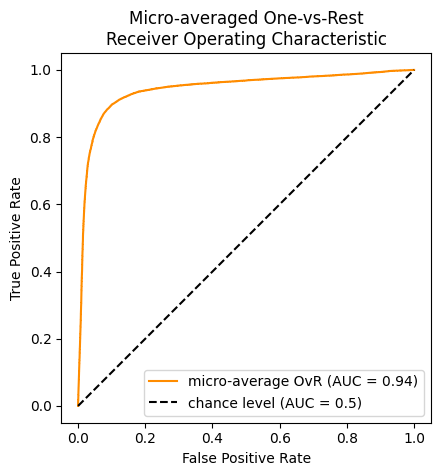

In [130]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()